## 1. Import necessary libraries

In [17]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf 

## 2.Buissness Understanding

Based on provided data, salary hike to be predicted using simple linear regression model.

## 3. Data collection

In [18]:
df = pd.read_csv(r'C:\Users\sawaled\Desktop\Personal\data\Assignment_4_Simple linear regression\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### ========================================================================================

## 4. Data understanding and Visualization

In [19]:
df.shape

(30, 2)

In [20]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [21]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

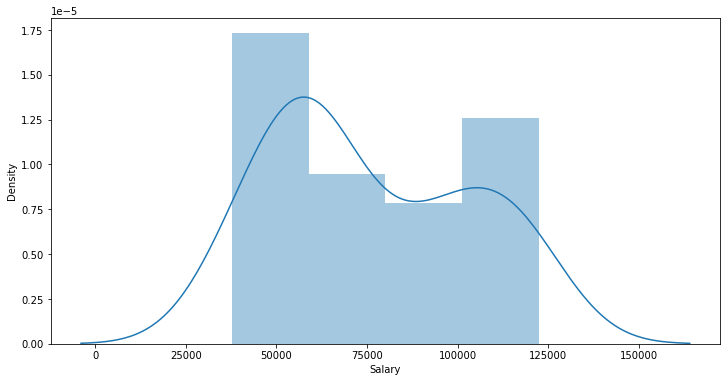

In [22]:
plt.figure(figsize=(12,6))
sns.distplot(df['Salary'])
plt.show()

### =======================================================================================

## 5. Data preparation and Model building and Evaluation with Scaled Values

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df)
df1 = pd.DataFrame(data= df1, columns=['YearsExperience', 'Salary'])

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### ========================================================================================

## 5.1. Linear regression assumption check

### 5.1.1 Linearity check

Text(0.5, 1.0, 'Linearity check')

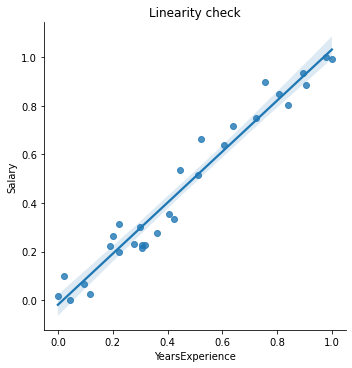

In [25]:
sns.lmplot( x= 'YearsExperience', y= 'Salary', data = df1)
plt.title('Linearity check')

### 5.1.2 Normality check

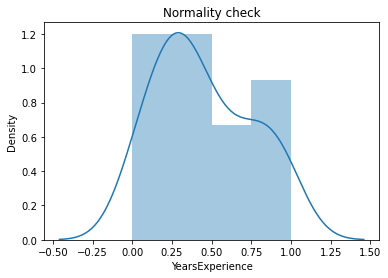

In [26]:
sns.distplot(a= df1['YearsExperience'],hist=True, kde=True)
plt.title('Normality check')
plt.show()

In [27]:
df1['YearsExperience'].skew() # skew is in range 0-0.5 #Moderately symmetriceal about mean

0.37956024064804145

### ========================================================================================

## 5.2 Model building

In [28]:
linear_model = smf.ols('Salary~YearsExperience', data= df1).fit()

In [29]:
linear_model.params

Intercept         -0.018236
YearsExperience    1.049252
dtype: float64

In [30]:
linear_model.summary() #Adjusted R value more than 90%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        16:01:35   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0182      0.023     -0.807      0.427      -0.065       0.028
YearsExperience     1.0493      0.042     24.950      0.000       0.963       1.135
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### =======================================================================================

## 5.3. Model prediction 

In [31]:
X = df1['YearsExperience']

In [32]:
y_pred = linear_model.predict(X).round().astype(int)

In [33]:
error= df1['Salary'] - y_pred
error.head()

0    0.019041
1    0.100094
2    0.000000
3    0.068438
4    0.025514
dtype: float64

In [34]:
mean_squared_error = np.mean((df1['Salary']-y_pred)**2)
mean_squared_error

0.06273510569749899

### =======================================================================================

## 5.4. Check for Homoscedasticity and Zero residual mean

### 5.4.1 Residual plot

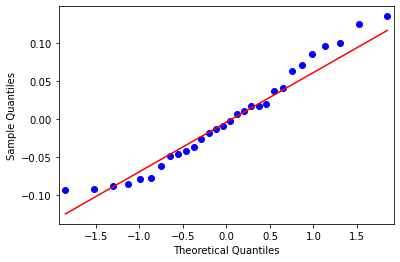

In [35]:
import statsmodels.api as sm
sm.qqplot(linear_model.resid, line='q')
plt.show()

### 5.4.2  Check for Homoscedasticity

plot of standardized fitted value vc standardised residual values

In [36]:
def std_value(i):
    return (i-i.mean())/i.std()

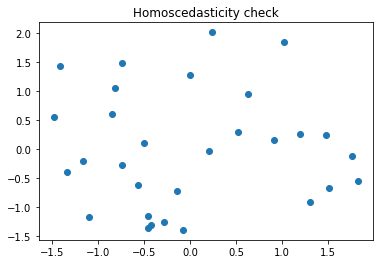

In [37]:
plt.scatter( x= std_value(linear_model.fittedvalues), y= std_value(linear_model.resid))
plt.title('Homoscedasticity check')
plt.show()

### =========================================================================================

### =========================================================================================

## 6. Data preparation and Model building and Evaluation with Square root Values

In [42]:
df2 = df.copy()
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [58]:
df2['Salary'] = np.sqrt(df2['Salary'])
df2.head()

,YearsExperience,Salary
0,1.1,3.252702
1,1.3,3.277323
2,1.5,3.246265
3,2.0,3.268194
4,2.2,3.254828


### ========================================================================================

## 6.1. Linear regression assumption check

### 6.1.1 Linearity check

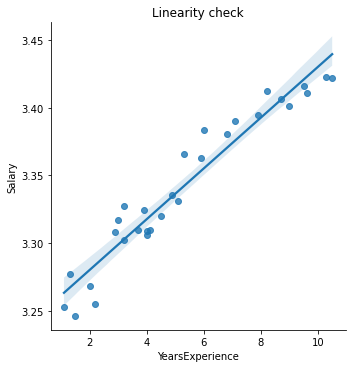

In [59]:
sns.lmplot( x= 'YearsExperience', y= 'Salary', data = df2)
plt.title('Linearity check')
plt.show()

### 6.1.2 Normality check

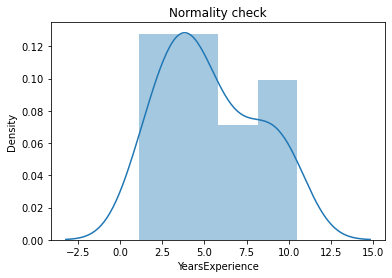

In [60]:
sns.distplot(a= df2['YearsExperience'],hist=True, kde=True)
plt.title('Normality check')
plt.show()

In [61]:
df2['YearsExperience'].skew() # skew is in range 0-0.5 #Moderately symmetriceal about mean

0.37956024064804106

### ========================================================================================

## 6.2 Model building

In [62]:
linear_model1 = smf.ols('Salary~YearsExperience', data= df2).fit()

In [63]:
linear_model1.params

Intercept          3.242661
YearsExperience    0.018754
dtype: float64

In [64]:
linear_model1.summary() #Adjusted R value more than 90%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     370.8
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.09e-17
Time:                        16:07:36   Log-Likelihood:                 84.691
No. Observations:                  30   AIC:                            -165.4
Df Residuals:                      28   BIC:                            -162.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.2427      0.006    554.785      0.000       3.231       3.255
YearsExperience     0.0188      0.001     19.256      0.000       0.017       0.021
==============================================================================
Omnibus:                        0.680   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.721
Skew:                           0.154   Prob(JB):                        0.697
Kurtosis:                       2.306   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### =======================================================================================

## 6.3. Model prediction 

In [65]:
X1 = df2['YearsExperience']

In [66]:
y_pred1 = linear_model1.predict(X1).round().astype(int)

In [67]:
error= df2['Salary'] - y_pred1
error.head()

0    0.252702
1    0.277323
2    0.246265
3    0.268194
4    0.254828
dtype: float64

In [68]:
mean_squared_error = np.mean((df2['Salary']-y_pred1)**2)
mean_squared_error

0.12012049827755715

### =======================================================================================

## 6.4. Check for Homoscedasticity and Zero residual mean

### 6.4.1 Residual plot

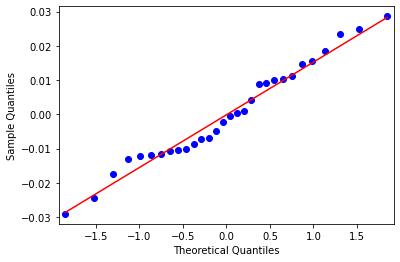

In [69]:
import statsmodels.api as sm
sm.qqplot(linear_model1.resid, line='q')
plt.show()

### 6.4.2  Check for Homoscedasticity

plot of standardized fitted value vc standardised residual values

In [70]:
def std_value(i):
    return (i-i.mean())/i.std()

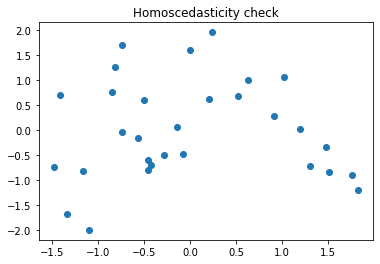

In [71]:
plt.scatter( x= std_value(linear_model1.fittedvalues), y= std_value(linear_model1.resid))
plt.title('Homoscedasticity check')
plt.show()

### =========================================================================================